In [7]:
import os
import datetime

print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

2022-05-15 11:00:43


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader,Dataset,TensorDataset

dftrain_raw = pd.read_csv('../data/titanic/train.csv')
dftest_raw = pd.read_csv('../data/titanic/test.csv')
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
1,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
2,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
3,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
4,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S


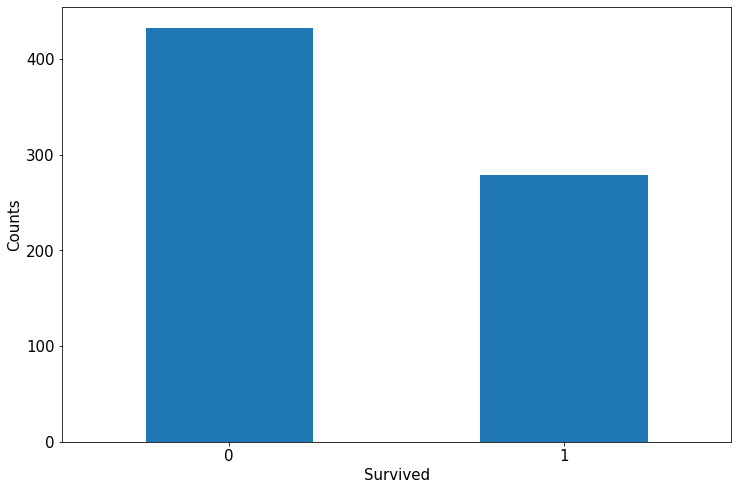

In [3]:
# 使用%matplotlib命令可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表，它有一个参数指定matplotlib图表的显示方式。inline表示将图表嵌入到Notebook中。
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Survived'].value_counts().plot(kind = 'bar',figsize = (12,8),fontsize = 15,rot = 0)                                                   #柱状图
ax.set_ylabel('Counts',fontsize = 15)#0，1的个数，只打印了四行
ax.set_xlabel('Survived',fontsize = 15)
plt.show()

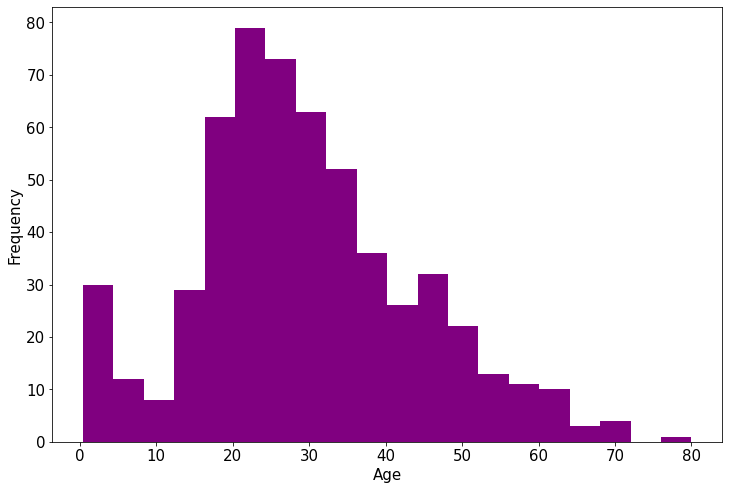

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
ax = dftrain_raw['Age'].plot(kind = 'hist',bins = 20,color = 'purple',figsize = (12,8),fontsize = 15)
ax.set_ylabel('Frequency',fontsize = 15)
ax.set_xlabel('Age',fontsize = 15)

plt.show()

In [14]:
dfresult = pd.DataFrame()
dfPclass  = pd.get_dummies(dftrain_raw['Pclass'])
dfPclass.columns = ['Pclass_' + str(x) for x in dfPclass.columns]
dfresult = pd.concat([dfresult,dfPclass],axis=1)
print(dfPclass)
print(dfresult)

     Pclass_1  Pclass_2  Pclass_3
0           1         0         0
1           1         0         0
2           0         1         0
3           0         1         0
4           0         0         1
..        ...       ...       ...
707         0         0         1
708         1         0         0
709         0         0         1
710         0         1         0
711         1         0         0

[712 rows x 3 columns]
     Pclass_1  Pclass_2  Pclass_3
0           1         0         0
1           1         0         0
2           0         1         0
3           0         1         0
4           0         0         1
..        ...       ...       ...
707         0         0         1
708         1         0         0
709         0         0         1
710         0         1         0
711         1         0         0

[712 rows x 3 columns]


In [7]:
dfresult['Age'] = dftrain_raw['Age'].fillna(0)#缺省值
dfresult['Age_null'] = pd.isna(dftrain_raw['Age']).astype('int32')
print(dfresult)

     Pclass_1  Pclass_2  Pclass_3   Age  Age_null
0           1         0         0  55.0         0
1           1         0         0  49.0         0
2           0         1         0  36.0         0
3           0         1         0  19.0         0
4           0         0         1  14.0         0
..        ...       ...       ...   ...       ...
707         0         0         1  24.0         0
708         1         0         0   0.0         1
709         0         0         1  45.0         0
710         0         1         0  35.0         0
711         1         0         0   0.0         1

[712 rows x 5 columns]


In [2]:
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw).values
y_train = dftrain_raw[['Survived']].values

x_test = preprocessing(dftest_raw).values
y_test = dftest_raw[['Survived']].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

print("y_train.shape =", y_train.shape )
print("y_test.shape =", y_test.shape )

x_train.shape = (712, 15)
x_test.shape = (179, 15)
y_train.shape = (712, 1)
y_test.shape = (179, 1)


In [3]:
dl_train = DataLoader(TensorDataset(torch.tensor(x_train).float(),torch.tensor(y_train).float()),shuffle=True,batch_size=8)
dl_valid = DataLoader(TensorDataset(torch.tensor(x_test).float(),torch.tensor(y_test).float()),shuffle=True,batch_size=8)

In [10]:
for features,labels in dl_train:
    print(features,labels)
    break

tensor([[ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  2.0000,
          0.0000, 23.2500,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  8.0000,  0.0000,  0.0000,
          2.0000, 26.2500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  4.0000,  0.0000,  3.0000,
          2.0000, 27.9000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 45.5000,  0.0000,  0.0000,
          0.0000,  7.2250,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  1.0000,
          0.0000, 24.1500,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 10.0000,  0.0000,  3.0000,
          2.0000, 27.9000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.0000, 30.0000,  0.0000,  0.0

In [4]:
#使用Sequential定义模型
import torch
def create_net():
    net = torch.nn.Sequential()
    net.add_module('linear1',torch.nn.Linear(15,20))
    net.add_module('relu1',torch.nn.ReLU())
    net.add_module('linear2',torch.nn.Linear(20,15))
    net.add_module('relu2',torch.nn.ReLU())
    net.add_module('linear3',torch.nn.Linear(15,1))
    net.add_module('sigmoid',torch.nn.Sigmoid())
    return net

mynetwork = create_net()
print(mynetwork)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [19]:
from torchkeras import summary
summary(mynetwork,input_shape=(15,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             320
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 15]             315
              ReLU-4                   [-1, 15]               0
            Linear-5                    [-1, 1]              16
           Sigmoid-6                    [-1, 1]               0
Total params: 651
Trainable params: 651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000057
Forward/backward pass size (MB): 0.000549
Params size (MB): 0.002483
Estimated Total Size (MB): 0.003090
----------------------------------------------------------------


In [8]:
#脚本风格训练
from torch import  nn
from sklearn.metrics import accuracy_score
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(params=mynetwork.parameters(),lr = 0.01)
metric_func = lambda y_pred,y_true: accuracy_score(y_true.data.numpy(),y_pred.data.numpy() > 0.5)
metric_name = 'accuracy'

epochs = 10
log_step_freq = 30

dfhistory = pd.DataFrame(columns=['epoch','loss',metric_name,'val_loss','val_'+metric_name])
print('start training...')
nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('========'*5+'%s'%nowtime)

for epoch in range(1,epochs+1):
    mynetwork.train()
    loss_sum = 0
    metric_sum = 0.0
    step = 1

    for step, (features,labels) in enumerate(dl_train,1):
        optimizer.zero_grad()

        predictions = mynetwork(features)
        loss = loss_func(predictions,labels)
        metric = metric_func(predictions,labels)

        loss.backward()
        optimizer.step()#单次优化

        loss_sum += loss.item()
        metric_sum += metric.item()
        if step% log_step_freq == 0:
            print(('[step = %d] loss: %.3f,'+metric_name+':%.3f')%(step,loss_sum/step,metric_sum/step))


    mynetwork.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1

    for val_step,(features,labels) in enumerate(dl_valid,1):
        with torch.no_grad():
            predictions = mynetwork(features)
            val_loss = loss_func(predictions,labels)
            val_metric = metric_func(predictions,labels)
        val_loss_sum += val_loss.item()
        val_metric_sum += val_metric.item()

    info = (epoch,loss_sum/step,metric_sum/step,val_loss_sum/val_step,val_metric_sum/val_step)
    dfhistory.loc[epoch - 1] = info

    print(("\nEPOCH = %d, loss = %.3f,"+ metric_name + \
          "  = %.3f, val_loss = %.3f, "+"val_"+ metric_name+" = %.3f")
          %info)

    nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    print("\n"+"=========="*8 + "%s"%nowtime)

print('Finished Training...')

start training...
========================================2022-05-15 11:00:47
[step = 30] loss: 0.689,accuracy:0.613
[step = 60] loss: 0.649,accuracy:0.652

EPOCH = 1, loss = 0.636,accuracy  = 0.654, val_loss = 0.661, val_accuracy = 0.649

================================================================================2022-05-15 11:00:48
[step = 30] loss: 0.587,accuracy:0.700
[step = 60] loss: 0.599,accuracy:0.688

EPOCH = 2, loss = 0.585,accuracy  = 0.698, val_loss = 0.517, val_accuracy = 0.730

================================================================================2022-05-15 11:00:48
[step = 30] loss: 0.547,accuracy:0.713
[step = 60] loss: 0.543,accuracy:0.733

EPOCH = 3, loss = 0.541,accuracy  = 0.737, val_loss = 0.474, val_accuracy = 0.768

================================================================================2022-05-15 11:00:48
[step = 30] loss: 0.504,accuracy:0.779
[step = 60] loss: 0.482,accuracy:0.796

EPOCH = 4, loss = 0.502,accuracy  = 0.791, val_loss = 0.5

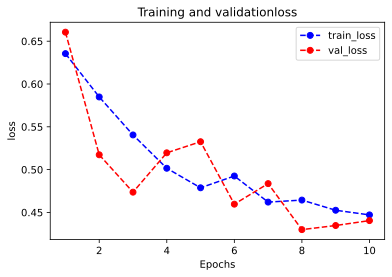

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(dfhistory,metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory['val_'+metric]
    epochs = range(1,len(train_metrics)+1)
    plt.plot(epochs,train_metrics,'bo--')
    plt.plot(epochs,val_metrics,'ro--')
    plt.title('Training and validation' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend(['train_'+metric,'val_'+metric])
    plt.show()

plot_metric(dfhistory,'loss')

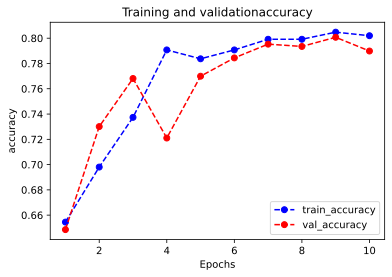

In [11]:
plot_metric(dfhistory,'accuracy')

In [12]:
print(mynetwork.state_dict().keys())

odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])


In [13]:
torch.save(mynetwork.state_dict(),'../file/net_param.pkl')
net_clone = create_net()
net_clone.load_state_dict(torch.load('../file/net_param.pkl'))
net_clone.forward(torch.tensor(x_test[0:10]).float()).data

tensor([[0.2099],
        [0.8539],
        [0.4149],
        [0.8150],
        [0.7044],
        [0.9808],
        [0.1626],
        [0.9424],
        [0.5598],
        [0.1689]])